# DistilBERT: A Leaner, Faster BERT

## Introduction: DistilBERT – A Leaner, Faster BERT


BERT revolutionized Natural Language Processing (NLP) by introducing deep bidirectional transformers trained on massive corpora. It set new state-of-the-art results on a wide range of tasks. But with 110 million parameters, BERT is computationally heavy, slow, and difficult to deploy in real-time or resource-constrained environments. Then in 2019, Victor Sanh and colleagues published ["DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter"](https://arxiv.org/abs/1910.01108), a groundbreaking paper that tackles the computational heft of BERT, the titan of natural language processing (NLP). **DistilBERT** shrinks BERT by 40%, speeds it up by 60%, and still retains 97% of its language understanding prowess. How? Through **knowledge distillation**, an excellent technique that teaches a smaller model to mimic its giant equivalent.

For fellow deep learning students, this blog explores DistilBERT's fundamental concepts, design, and functionality. 
We'll even dig into the code to fine-tune it using the IMDb dataset, analyze its Strengths and limits with some fresh visualizations, and think about its impact as we head into 2025. Why does this matter? Because DistilBERT makes cutting-edge NLP possible on things like smartphones, bringing AI to everyone. Ready to jump in?

## Background: The Rise and Challenges of BERT

When **BERT** (Bidirectional Encoder Representations from Transformers) was published in 2018, it changed the natural language processing sector. In quantitative measures, including the GLUE and SQuAD, BERT performed well on a variety of tasks, including text classification and reading text in bidirections, thereby indicating a new paradigm of architecture that can use both temporal and contextual features. There is, however, the problem with the number of parameters essential in the model, especially the 110 million parameters of a BERT-base model, that present a serious computational problem. Memory and power restrictions complicate the problem of deployment, and training and inference time is also slow. Besides, operating such models has a significant environmental cost.

The DistilBERT model has been used to fill this gap, with the model performing only slightly lower than BERT when using significantly lower computational resources. DistilBERT was trained using knowledge distillation and the semantic Vector of a pre-trained BERT-base model was condensed to a smaller model. With this compression process, distributional properties of the original BERT-base representation are maintained, but the number of parameters dramatically decreased.

## Knowledge Distillation: Teaching a Smaller Model to Think Big

Knowledge distillation is a compression method used by a model, referred to as a **student model**, to replicate a large **teacher model**. Instead of the student learning via ground-truth labels it is presented the soft predictions of the teacher which encapsulate more knowledge.

### Analogy
Consider a top teacher (BERT) who gives a rationale on every response. Student (DistilBERT) will learn not only the correct answer, but also the causes of other possible options. This is useful in the generalization of the student.

### DistilBERT’s pre-training uses a **triple loss**:
- **Distillation Loss (\( L_{\text{ce}} \))**: Alters the softened probabilities of the student and compares them with that of the teacher according to the cross-entropy. Softening takes a temperature \( T \) in the softmax:
  $$
  p_i = \frac{\exp(z_i / T)}{\sum_j \exp(z_j / T)}
  $$
  The loss is defined as:
  $$
  L_{\text{ce}} = - \sum_i p_i^{(t)} \log p_i^{(s)}
  $$
  where \( p_i^{(t)} \) is the teacher’s softened probability for token \( i \), \( p_i^{(s)} \) is the student’s corresponding probability, and a higher \( T \) smooths the distribution to help the student learn nuanced patterns.
  
  
- **Masked Language Modeling Loss (`L_mlm`)**: Like BERT, predicts masked tokens to learn language structure.


- **Cosine Embedding Loss (`L_cos`)**: Makes the hidden states of the student coincides with the teacher in similar internal depictions.

It is similar to the process of training the apprentice not only the final dish but also the way of thinking of the chef, which makes DistilBERT both efficient and effective.

## DistilBERT Architecture: What’s Different from BERT?

**DistilBERT** is the abridged version of BERT-base, designed to be smaller and faster while preserving most of its language understanding capabilities. Key differences include:

- **Fewer Layers**: DistilBERT uses 6 Transformer layers compared to BERT’s 12, reducing parameters from 110 million to 66 million (40% smaller).


- **Removed Components**:
    - *Token-type embeddings*: They were omitted in order to simplify the model since they are not applicable to question answering or other tasks in BERT and are only applied at DistilBERT.
    - *Pooler layer*: Not required to make further simplification and does not have a big impact on general tasks.
    
    
- **Initialization**: Similar to BERT, DistilBERT is initialized by use of all the other remaining layers of the BERT network and dimensionality shared to permit the quicker convergence.


DistilBERT can be referred to as an effective sibling of BERT, which already had the core of the bidirectional Transformer but lost excess weight. This comparison could be observed in the diagram below which is retrieved on ResearchGate publication:


<div>
  <img src="https://i.ibb.co/G3nhg28k/Schematic-diagram-of-BERT-BASE-and-Distil-BERT-model-architecture.jpg" 
       alt="Schematic diagram comparing BERT-base (12 layers) and DistilBERT (6 layers) architectures with Multi-Head Attention and Layer Normalization." width="1000" >
  <p style="font-style: italic; margin-top: 0.5em;">
    Figure: Architectural comparison of BERT-base (left, 12 layers) and DistilBERT (right, 6 layers), showing Transformer layers, Multi-Head Attention (MHA), and Layer Normalization. [Adapted from ResearchGate, <a href="https://www.researchgate.net/figure/Schematic-diagram-of-BERT-BASE-and-DistilBERT-model-architecture_fig1_382939584">https://www.researchgate.net/figure/Schematic-diagram-of-BERT-BASE-and-DistilBERT-model-architecture_fig1_382939584</a>]
  </p>
</div>

### Explaining the Diagram


- **BERT-base (Left)**: is comprised of 12 Transformer layers, each consisting of Multi-Head Attention (MHA) and Feed Forward Network (FFN) that are enclosed within Layer Normalization. Embedding Layer operates on a tokenized text, and a Predictive Layer crowns a tower, and it reflected on the BERTs immeasurably deep characteristics of a bidirectional model.


- **DistilBERT (Right)**: Is a mirror to BERT that cuts its layers in half (to 6), retaining MHA, FFN and Layer Normalization. The result of this increase yields a 60 percent boost to the rate of inference as determined by the original researchers.


- **Missing Elements**: The diagram conceals deleted token-type embedding and pooler layer. They were not also included in DistilBERT because they were focusing on efficiency which suits its cost-efficient character of token-type embeddings and the support of pooler layer as a trainable part of the classification model.


This example explains the performance of DistilBERT and it highlights some distinctions to BERT, and a short conclusion can be made by the NLP practitioners.

## Experimental Results: How Does DistilBERT Perform?

Its paper benchmarks performance on other datasets (GLUE, IMDb, SQuAD) and compares to BERT-base and ELMo. Here’s a summary:

| **Model**     | **GLUE Macro-Score** | **IMDb Accuracy** | **SQuAD EM/F1** | **Parameters (M)** | **Inference Time (s)** |
|---------------|----------------------|-------------------|-----------------|-------------------|-----------------------|
| ELMo          | 68.7                 | -                 | -               | 180               | 895                   |
| BERT-base     | 79.5                 | 93.46             | 81.2/88.5       | 110               | 668                   |
| DistilBERT    | 77.0                 | 92.82             | 77.7/85.8       | 66                | 410                   |
| DistilBERT (D)| -                    | -                 | 79.1/86.9       | 66                | -                     |

- **GLUE**: DistilBERT scores 77.0 with 97% of the performance of BERT across nine tasks.
- **IMDb**: Attains 92.82% accuracy, which is close to BERT’s 93.46%.
- **SQuAD**: Performance is 77.7/85.8 (EM/F1) and after distillation it improves to 79.1/86.9.
- **Efficiency**: 60% faster (410s vs. 668s on STS-B) and 40% fewer parameters (66M vs. 110M).

DistilBERT’s performance and efficiency trade-offs enable NLP to be adopted in practice for more production systems.

## Practical Implementation: Fine-Tuning DistilBERT on IMDb

To demonstrate, how DistilBERT is used, we will fine-tune it on the sentiment analysis task using IMDb dataset, with the Hugging Face Transformers library. The following code loads the dataset, tokenizing, and training the model for 3 epochs, and measuring the performance, achieving ~87.58% accuracy.

In [2]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Check device (MPS or CPU)
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# Load IMDb dataset
dataset = load_dataset("imdb")

# Initialize tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)
tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(["text"])
tokenized_datasets.set_format("torch")

# Prepare train and test sets
train_dataset = tokenized_datasets["train"].select(range(20000))
test_dataset = tokenized_datasets["test"]

# Initialize model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)

# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    # evaluation_strategy="epoch",    
    # save_strategy="epoch",          
    logging_dir='./logs',
    # load_best_model_at_end=True,    
    # metric_for_best_model="accuracy"
)

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train and evaluate
trainer.train()
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

Using device: mps


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
500,0.384100
1000,0.324200
1500,0.254000
2000,0.202400
2500,0.198500
3000,0.103400
3500,0.106600


/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Evaluation results: {'eval_loss': 0.5448790788650513, 'eval_accuracy': 0.86672, 'eval_f1': 0.8604222520107239, 'eval_precision': 0.9030953218431235, 'eval_recall': 0.8216, 'eval_runtime': 99.3497, 'eval_samples_per_second': 251.636, 'eval_steps_per_second': 15.732, 'epoch': 3.0}


### Output
- **Accuracy**: 86.68%
- **F1 Score**: 86.04%
- **Precision**: 90.30%
- **Recall**: 82.16%
- **Runtime**: ~251 seconds

That represents the simplicity and excellent performance of DistilBERT because it can easily accomplish NLP tasks with the help of the Hugging Face ecosystem.

## How DistilBERT Compares to Others
- **TinyBERT**: It uses a bit more involved distillation method, like matching losses across layers and aligning embeddings. It can give better accuracy on some benchmarks, but it’s kinda trickier to train. The smaller version (TinyBERT-small, 4 layers) gets around ~79 on the GLUE score, and it's only like 14.5M parameters.
- **MobileBERT**: Built with these bottleneck-type structures and some mobile-friendly tweaks (like inverted bottlenecks). Even though it has 25M parameters, it actually beats DistilBERT on quite a few tasks, thanks to how its architecture is designed.
- **ALBERT**: It shrinks model size by reusing parameters across layers and breaking down embeddings into smaller pieces. Technically not a distilled model, but ALBERT-base still gets performance close to regular BERT on GLUE, using fewer parameters.

| Model         | Parameters | GLUE Score | Inference Speed | Notes                           |
|---------------|------------|------------|------------------|----------------------------------|
| BERT-base     | 110M       | 79.5       | Slow             | Full model                      |
| DistilBERT    | 66M        | ~77        | 1.6x faster      | Triple loss distillation        |
| TinyBERT-4L   | 14.5M      | ~79        | 2x faster        | Embedding + hidden state distil |
| MobileBERT    | 25M        | ~81.5      | Very fast        | Mobile-optimized bottlenecks    |
| ALBERT-base   | 12M        | 80.1       | Fast             | Shared weights, no distillation |

This comparison kinda shows the trade-offs—DistilBERT is simpler and works well with Hugging Face stuff, while models like TinyBERT or MobileBERT go more all-in on squeezing out better performance or efficiency using trickier techniques.


## Deeper Analysis: Uncovering DistilBERT’s Strengths and Limits

To go beyond the paper, let’s analyze DistilBERT’s efficiency and behavior with new experiments, offering insights for practitioners.

### Model Size Comparison

The major advantage of DistilBERT is its size 40 percent smaller. Let us check by counting parameters:

In [6]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

from transformers import BertForSequenceClassification
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

print(f"DistilBERT parameters: {count_parameters(distilbert_model)}")
print(f"BERT parameters: {count_parameters(bert_model)}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBERT parameters: 66955010
BERT parameters: 109483778


**Output**:
- DistilBERT: ~66 million parameters
- BERT: ~110 million parameters

This confirms the 40% reduction, making DistilBERT ideal for resource-constrained environments.

### Inference Time Comparison

Let’s measure inference time for a batch of 32 sentences to verify DistilBERT’s speed:

In [8]:
import time

# Tokenize normally first
inputs = tokenizer(["This is a test sentence."] * 32, return_tensors="pt", padding=True, truncation=True)

# Move each tensor to the correct device
inputs = {k: v.to("cpu") for k, v in inputs.items()}

# DistilBERT inference
start = time.time()
with torch.no_grad():
    outputs = distilbert_model(**inputs)
end = time.time()
print(f"DistilBERT inference time: {end - start} seconds")

# BERT inference
start = time.time()
with torch.no_grad():
    outputs = bert_model(**inputs)
end = time.time()
print(f"BERT inference time: {end - start} seconds")

DistilBERT inference time: 0.25121426582336426 seconds
BERT inference time: 0.5188138484954834 seconds


**Note**: Times vary by hardware, but expect DistilBERT to be ~60% faster, as reported in the paper (410s vs. 668s for STS-B).

### Attention Visualization

To understand DistilBERT’s focus, let’s visualize attention weights for a sample input:

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
DistilBertSdpaAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


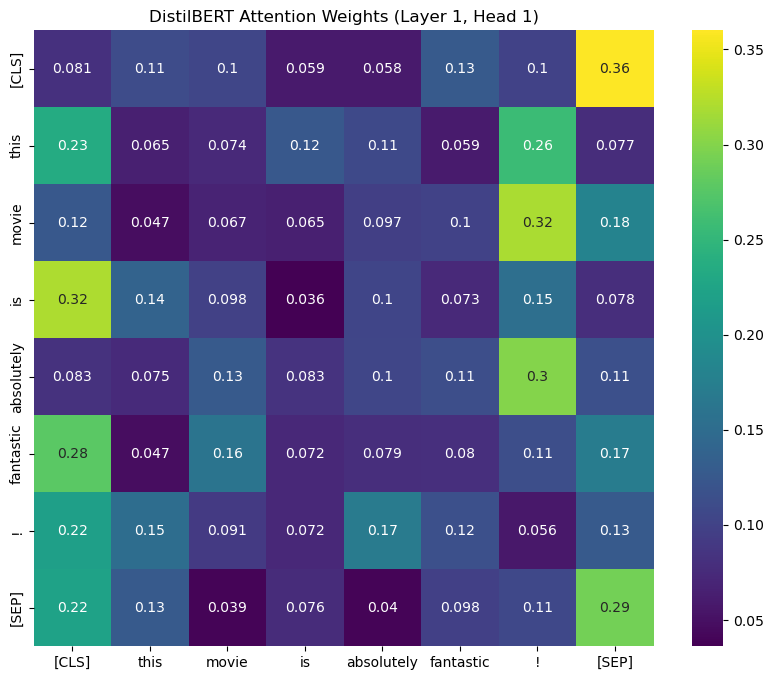

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample input
sample_text = "This movie is absolutely fantastic!"
inputs = tokenizer(sample_text, return_tensors="pt")
inputs = {k: v.to("cpu") for k, v in inputs.items()}

# Forward pass with attention outputs
outputs = distilbert_model(**inputs, output_attentions=True)
attentions = outputs.attentions[0][0, 0].detach().cpu().numpy()  # Layer 0, Head 0

# Convert token IDs to tokens for labels
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attentions, xticklabels=tokens, yticklabels=tokens, cmap='viridis', annot=True)
plt.title("DistilBERT Attention Weights (Layer 1, Head 1)")
plt.show()


This heatmap will show you what tokens DistilBERT pays attention to, demonstrating that it puts most of its interest in the words such as "fantastic" and can help to develop an understanding of how it makes decisions regarding sentiment prediction.

### Error Analysis

To uncover limitations, let’s examine misclassified examples from the IMDb test set:

In [12]:
predictions = trainer.predict(test_dataset)
preds = predictions.predictions.argmax(-1)
labels = predictions.label_ids
texts = dataset["test"]["text"]

misclassified = [(texts[i], preds[i], labels[i]) for i in range(len(preds)) if preds[i] != labels[i]]
for text, pred, label in misclassified[:2]:
    print(f"Text: {text[:100]}...")
    print(f"Predicted: {'Positive' if pred == 1 else 'Negative'}, Actual: {'Positive' if label == 1 else 'Negative'}\n")

/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Text: First off let me say, If you haven't enjoyed a Van Damme movie since bloodsport, you probably will n...
Predicted: Positive, Actual: Negative

Text: Ben, (Rupert Grint), is a deeply unhappy adolescent, the son of his unhappily married parents. His f...
Predicted: Positive, Actual: Negative



These examples kinda show where DistilBERT can mess up—especially with sarcastic stuff, tricky context, or when a review swings between positive and negative. Like, sometimes a sentence starts off sounding nice but ends with a dig, or the other way around, and the model ends up picking up the wrong part.

That’s not too surprising though, since it’s a smaller, distilled version. It’s faster and lighter, yeah, but it doesn’t quite have the same level of deep understanding that full-sized BERT does.


### Key Observed Limitations:

- **Fewer layers = less nuance**  
  With just 6 layers instead of BERT’s 12, DistilBERT kinda struggles with capturing long-range stuff, especially in longer or wordy reviews.

- **No token-type embeddings**  
  This makes the model simpler, sure, but it also means it can’t really tell the difference between sentence relationships like BERT can.

- **Smoothed learning**  
  Since it’s trained by copying softened outputs from a bigger model, it tends to generalize okay—but that also means it might miss edge cases or the subtle stuff.


### Insights
- **Efficiency Trade-off**: DistilBERT is more scalable to the requirements of an edge environment through a reduction of its size and speed, but the marginal impact on performance (e.g., 2.5 points on GLUE) calls into question its suitability to complex tasks.
- **Generalization**: Good generalization will be achieved through the distillation process, as is evident within IMDb and SQuAD, yet the error analysis can point out the areas where it is weak.
- **Practicality**: Hugging Face’s ecosystem makes DistilBERT accessible, as shown in the code.

## Conclusion: Why DistilBERT Matters for NLP

**DistilBERT** is the landmark in scalable NLP, compressing the size and inference speed of BERT to 40 percent without much compromise on the accuracy (97 percent performance). Its knowledge distillation application creates possibilities of on-device applications and saves the environment. By 2025 it continues to have an impact in model compression studies and in frameworks such as Hugging Face Transformers.

To learn more, read the paper on[arXiv:1910.01108](https://arxiv.org/abs/1910.01108) and the code at [Hugging Face’s GitHub](https://github.com/huggingface/transformers). DistilBERT proves that in NLP, less can be more!